# <div style="color:#fff;display:fill;border-radius:10px;background-color:#004F98;text-align:center;letter-spacing:0.1px;overflow:hidden;padding:20px;color:white;overflow:hidden;margin:0;font-size:100%">Engine Motor</div>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Data Preparation

In [8]:
# Load data
data = pd.read_excel('dataset.xlsx')
data.head()

Channel name  Tachometer     Motor  Bearing 1 Z  Bearing 1 Y  Bearing 1 X  \
0      0.000000   -0.862248 -0.006745     0.001761    -0.004679    -0.013791   
1      0.000156   -0.862027 -0.004338     0.003282    -0.004457    -0.011917   
2      0.000313   -0.861926 -0.004338     0.002058    -0.005458    -0.012817   
3      0.000469   -0.861743 -0.005671     0.001390    -0.005235    -0.013941   
4      0.000625   -0.861795 -0.004486     0.003616    -0.004605    -0.013229   

   Bearing 2 Z  Bearing 2 Y  Bearing 2 X   Gearbox  ClassID  
0    -0.000338    -0.022432     0.011058  0.008017        0  
1     0.000923    -0.020548     0.013694  0.009252        0  
2     0.000255    -0.018701     0.011838  0.010001        0  
3     0.000997    -0.019366     0.011430  0.009926        0  
4    -0.001414    -0.019292     0.012580  0.009364        0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128000 entries, 0 to 127999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Channel name  128000 non-null  float64
 1   Tachometer    128000 non-null  float64
 2   Motor         128000 non-null  float64
 3   Bearing 1 Z   128000 non-null  float64
 4   Bearing 1 Y   128000 non-null  float64
 5   Bearing 1 X   128000 non-null  float64
 6   Bearing 2 Z   128000 non-null  float64
 7   Bearing 2 Y   128000 non-null  float64
 8   Bearing 2 X   128000 non-null  float64
 9   Gearbox       128000 non-null  float64
 10  ClassID       128000 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 10.7 MB


In [10]:
data.describe()

Channel name     Tachometer          Motor    Bearing 1 Z  \
count  128000.000000  128000.000000  128000.000000  128000.000000   
mean        4.999922      -0.001186      -0.000513       0.007289   
std         2.886763       1.826205       0.004598       0.005101   
min         0.000000      -1.287634      -0.013853      -0.024392   
25%         2.499961      -0.857364      -0.002487       0.004581   
50%         4.999922      -0.845807      -0.000525       0.007289   
75%         7.499883      -0.836252       0.001400       0.009849   
max         9.999844       4.413378       0.012063       0.272125   

         Bearing 1 Y    Bearing 1 X    Bearing 2 Z    Bearing 2 Y  \
count  128000.000000  128000.000000  128000.000000  128000.000000   
mean       -0.004208      -0.013398       0.001142      -0.020441   
std         0.003005       0.002547       0.001742       0.001595   
min        -0.046701      -0.035948      -0.009316      -0.029783   
25%        -0.005865      -0.014991       0.000033      -0.021545   
50%        -0.003938      -0.013304       0.001146      -0.020474   
75%        -0.002345      -0.011729       0.002296      -0.019329   
max         0.035935       0.009528       0.012943      -0.013640   

         Bearing 2 X        Gearbox        ClassID  
count  128000.000000  128000.000000  128000.000000  
mean        0.011507       0.008261       0.500000  
std         0.002407       0.001559       0.500002  
min        -0.005087       0.000493       0.000000  
25%         0.009908       0.007193       0.000000  
50%         0.011392       0.008241       0.500000  
75%         0.013137       0.009289       1.000000  
max         0.026535       0.017112       1.000000

In [11]:
data.dtypes

Channel name    float64
Tachometer      float64
Motor           float64
Bearing 1 Z     float64
Bearing 1 Y     float64
Bearing 1 X     float64
Bearing 2 Z     float64
Bearing 2 Y     float64
Bearing 2 X     float64
Gearbox         float64
ClassID           int64
dtype: object

In [12]:
data.columns

Index(['Channel name', 'Tachometer', 'Motor', 'Bearing 1 Z', 'Bearing 1 Y',
       'Bearing 1 X', 'Bearing 2 Z', 'Bearing 2 Y', 'Bearing 2 X', 'Gearbox',
       'ClassID'],
      dtype='object')

In [13]:
data.shape

(128000, 11)

## Check Null Values

In [15]:
data.isnull().sum()

Channel name    0
Tachometer      0
Motor           0
Bearing 1 Z     0
Bearing 1 Y     0
Bearing 1 X     0
Bearing 2 Z     0
Bearing 2 Y     0
Bearing 2 X     0
Gearbox         0
ClassID         0
dtype: int64

## Visualize Data Distribution

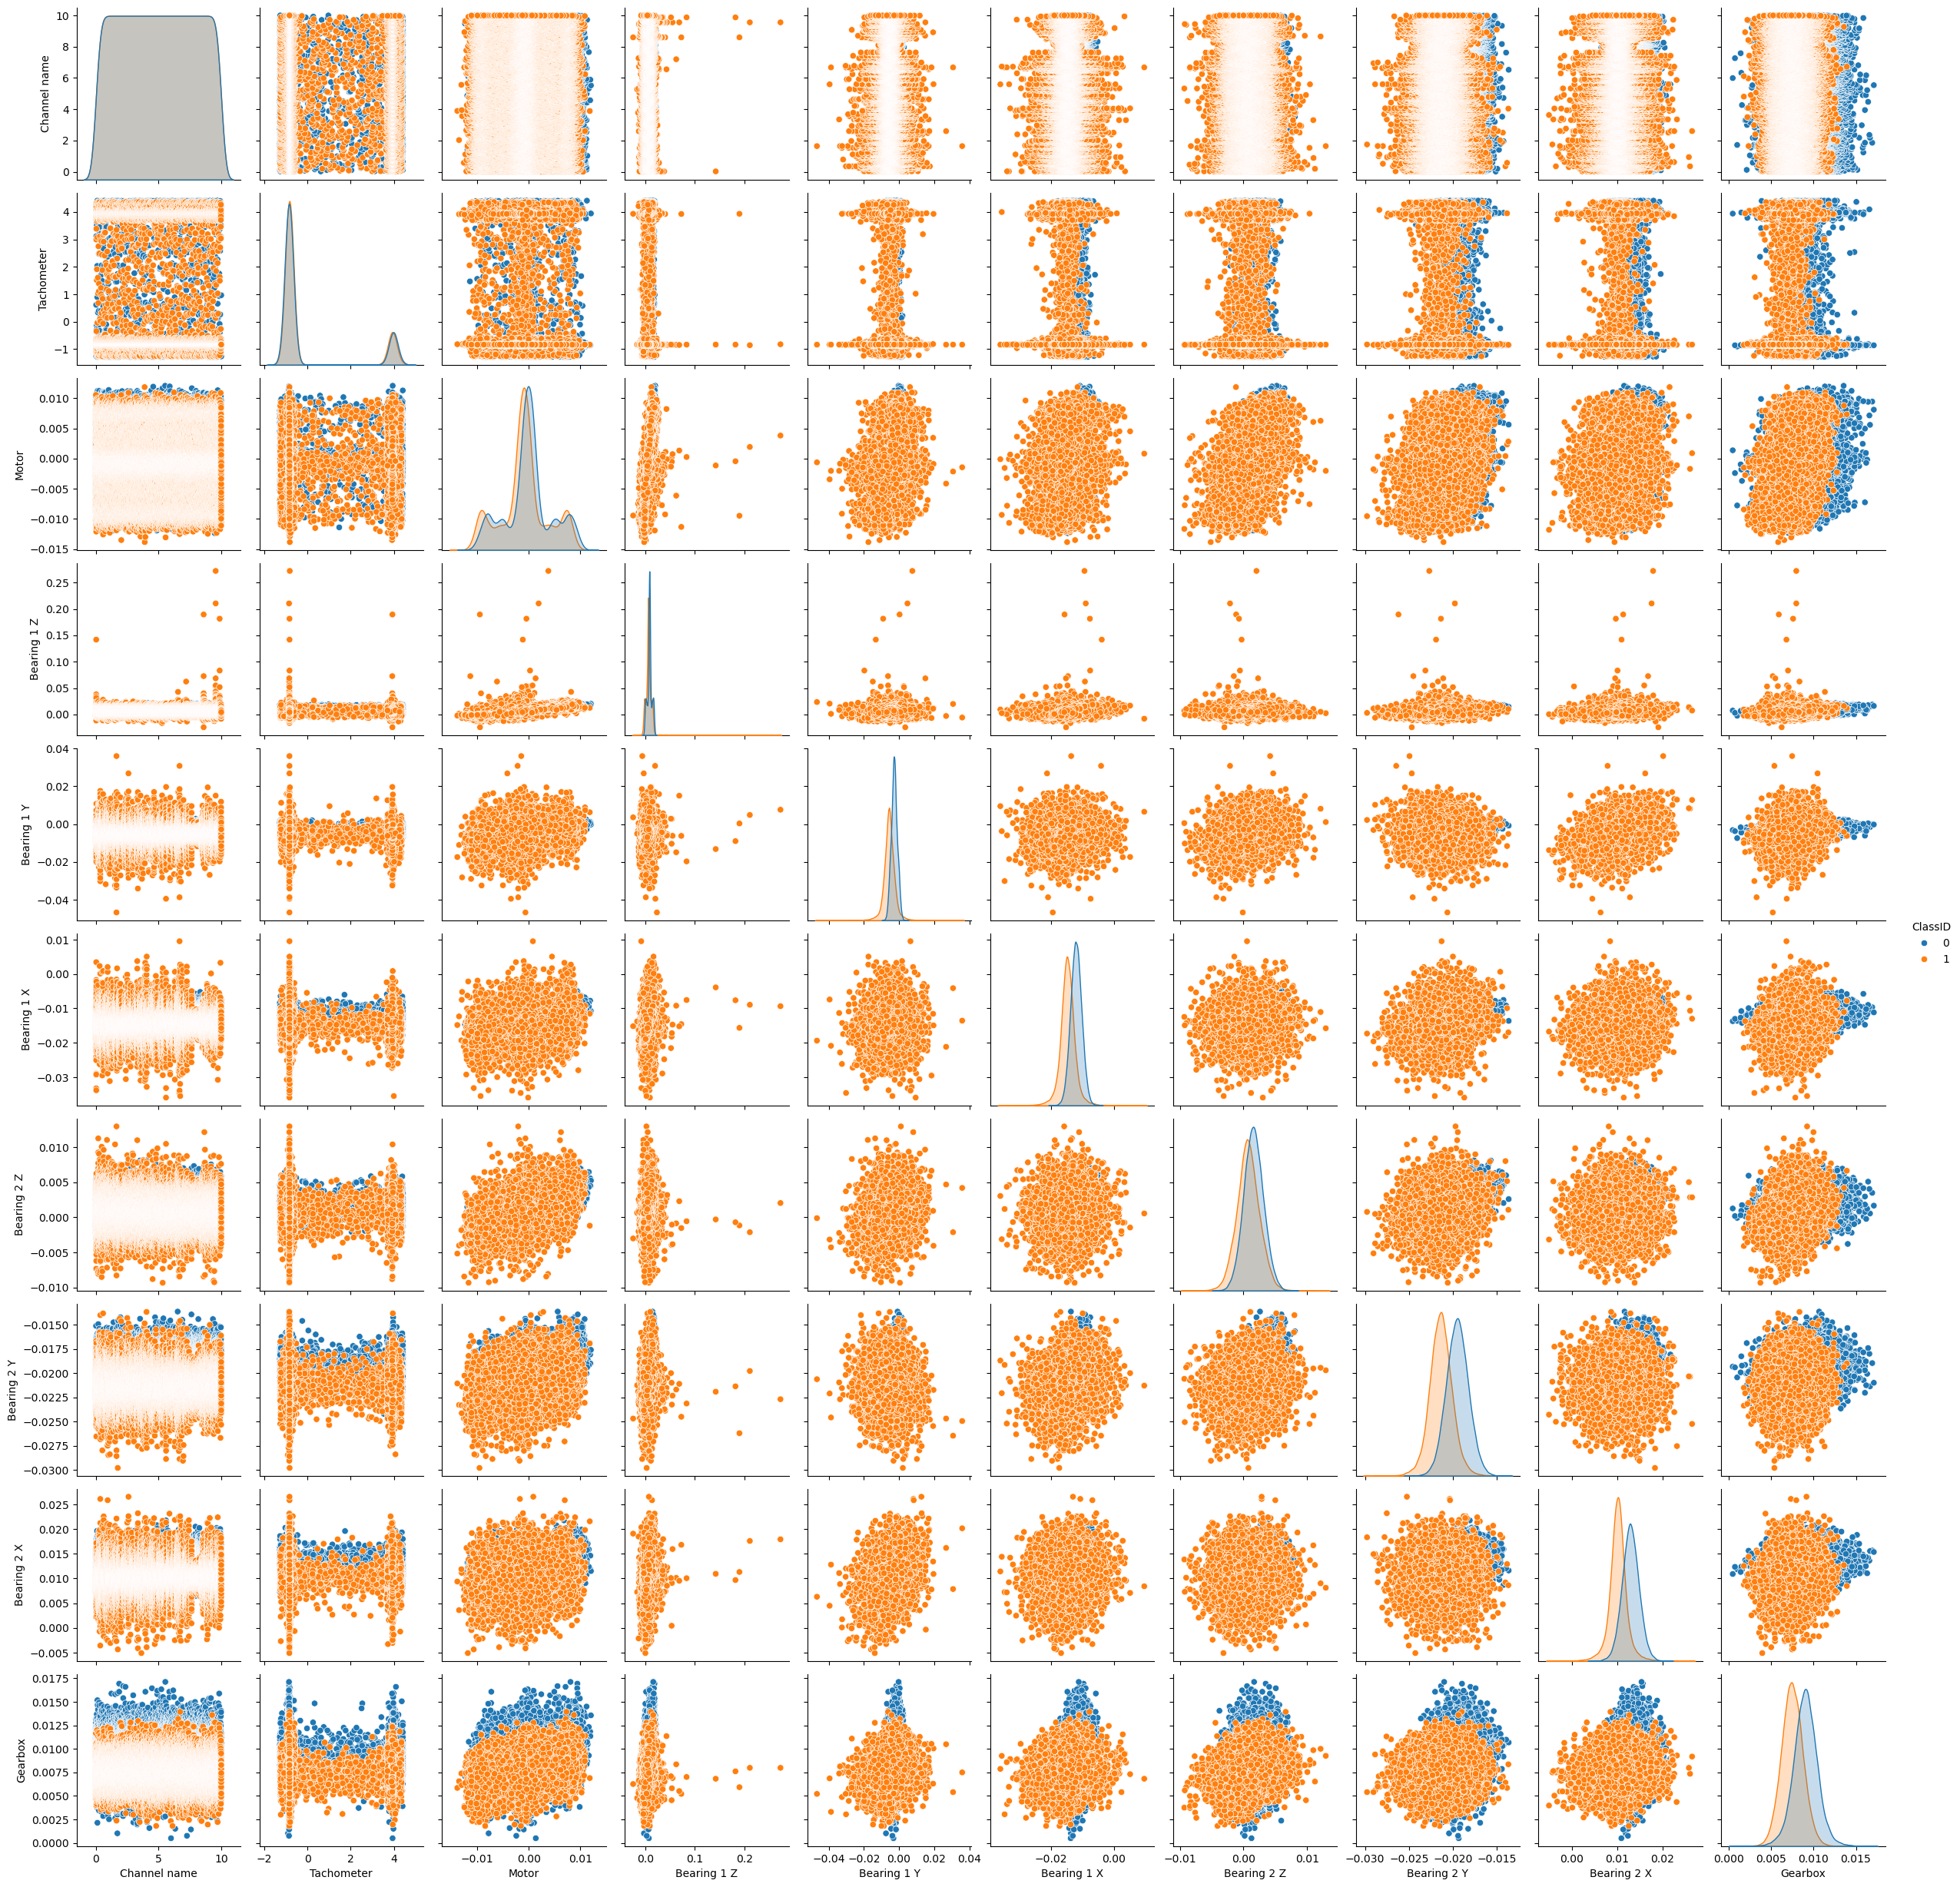

In [17]:
sns.pairplot(data, hue="ClassID")
plt.show()

In [18]:
data.corr().style.background_gradient(cmap='coolwarm').format(precision=2)

## Separate features and target

In [29]:
X = data.drop('ClassID', axis=1)
y = data['ClassID']

## Data Partitioning

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature Scaling

In [35]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Gradient Boosting (XGBoost)

In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_xgb = grid_search.best_estimator_

## Classification Report & Confusion Matrix

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# For Random Forest
y_pred = best_xgb.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12909
           1       0.99      0.98      0.99     12691

    accuracy                           0.99     25600
   macro avg       0.99      0.99      0.99     25600
weighted avg       0.99      0.99      0.99     25600

[[12758   151]
 [  197 12494]]


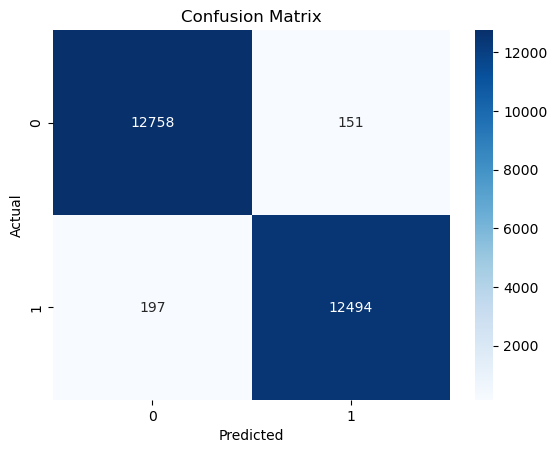

In [45]:
## Visualize confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [47]:
# Feature importance
importances = best_xgb.feature_importances_
features = X.columns
pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values('Importance', ascending=False)

Feature  Importance
1    Tachometer    0.570660
8   Bearing 2 X    0.111711
7   Bearing 2 Y    0.085285
4   Bearing 1 Y    0.061595
2         Motor    0.051939
5   Bearing 1 X    0.050903
9       Gearbox    0.039275
3   Bearing 1 Z    0.016898
6   Bearing 2 Z    0.007656
0  Channel name    0.004079

### Optimization Strategies
- Feature Engineering:

- Create interaction terms between bearing sensors

- Add statistical features (rolling means, std dev)

- Consider frequency domain features (FFT) if time-series

- Class Imbalance Handling:
  use SMOTE or class weights

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

### Dimensionality Reduction:

- PCA if features are highly correlated

In [56]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_train_scaled)

In [106]:
## Model Evaluation and Visualization
def evaluate_and_visualize(model, X_train, X_test, y_train, y_test, feature_names):
    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)
    
    # Evaluation metrics
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Feature Importance
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(10, 6))
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        plt.title("Feature Importances")
        plt.bar(range(len(importances)), importances[indices], align="center")
        plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.show()
    
    # Confusion Matrix Heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Dimensionality Reduction Visualization
    plot_dimensionality_reduction(X_train, y_train, feature_names)
    
    # Learning Curve
    plot_learning_curve(model, X_train, y_train)


def main():


Step 4: Evaluating XGBoost model...

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12909
           1       0.99      0.98      0.99     12691

    accuracy                           0.99     25600
   macro avg       0.99      0.99      0.99     25600
weighted avg       0.99      0.99      0.99     25600


Confusion Matrix:
[[12743   166]
 [  191 12500]]


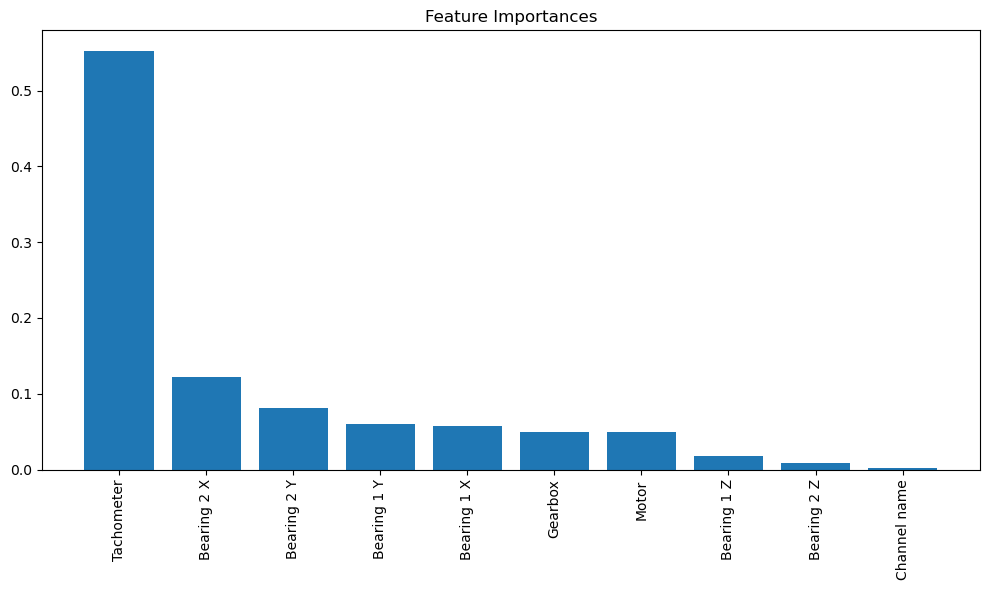

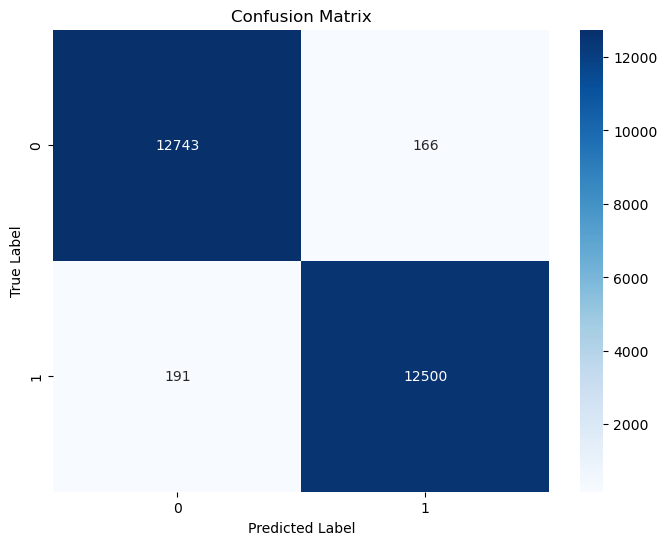

NameError: name 'TSNE' is not defined

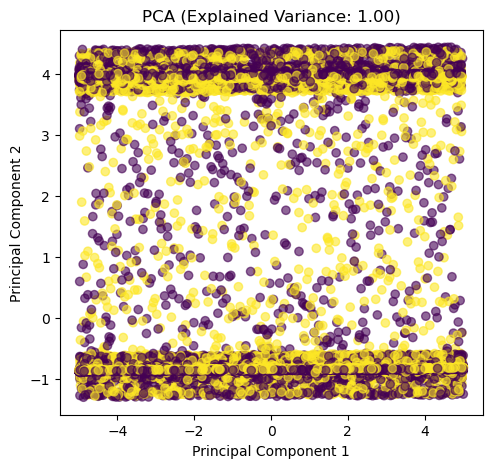

In [110]:
print("\nStep 4: Evaluating XGBoost model...")
evaluate_and_visualize(xgb_model, X_train, X_test, y_train, y_test, features)

In [43]:
import joblib

# Save the best model and scaler
joblib.dump(best_xgb, 'classifier_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']